In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate
import math
import lab_funcs as lf
import my_funcs as mf

# Интерполяция многочленами


## Задания
1. Измените метод `__call__`, так чтобы он реализовывал [схему Горнера](https://ru.wikipedia.org/wiki/Схема_Горнера). Чем эта схема лучше?
2. Почему нахождение коэффициентов интерполяционного многочлена через решение системы дает ошибочный ответ? 
3. Найдите определитель матрицы Вандермонда теоретически и численно. 
4. Найдите числа обусловленности матрицы Вандермонда. Сравните экспериментально полученные погрешности решения системы и невязку с теоретическим предсказанием.

## Решения
1. В схеме Горнера выполняется меньше арифметических действий, тем самым алгоритм работает быстрее. Также тратит меньше ресурсов. Горнер - $2n$, предыдущая реализация - $3n$.

2. Находя коэффициенты способом решения СЛАУ мы получаем большую погрешность (Плохое обусловливание матрицы). Лучше изначально узнать формулу для коэффициентов интерполяционного многочлена аналитически и применять ее, тем самым будет меньше вычислений и меньше погрешность.

Absolute error of values 5.815173923391337e-12
Absolure Horner error of values 4.5367587665182066e-12
Absolute coef error of coefficients 84471.09093929436
Absolute Horner's coef error of coefficients 84471.09093929436


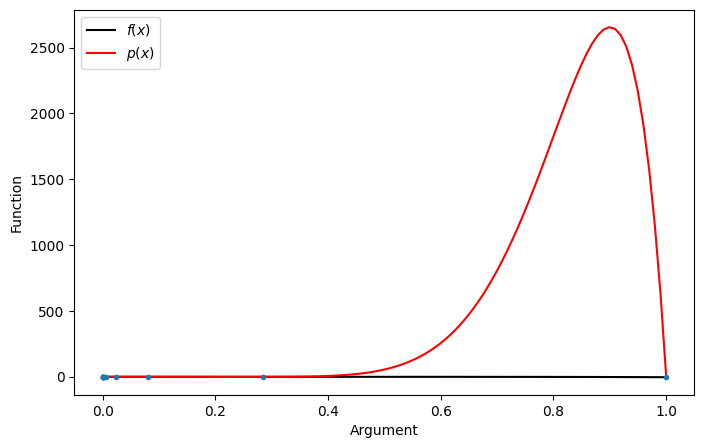

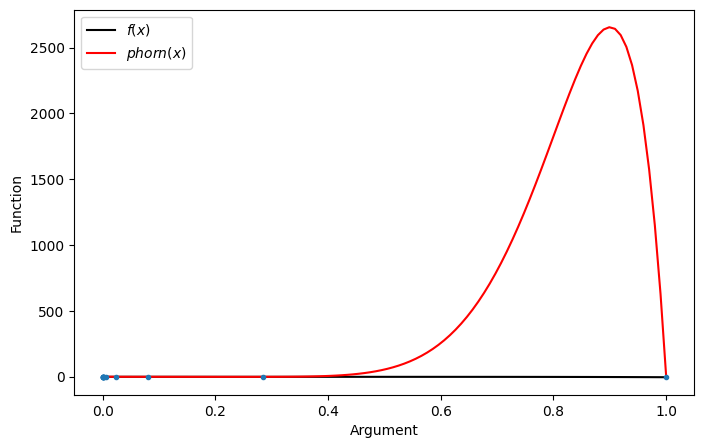

In [2]:
N = 12 
x = np.logspace(-6,0,N) 

f = mf.Poly(np.random.randn(N))
y = f(x) 
p = lf.interp_naive(x, y) 
p_horn = mf.interp_Horn(x, y)
z = p(x) 
z_horn = p_horn(x)
print("Absolute error of values", np.linalg.norm(z-y))
print("Absolure Horner error of values", np.linalg.norm(z_horn - y))
print("Absolute coef error of coefficients", np.linalg.norm(f.pn-p.pn))
print("Absolute Horner's coef error of coefficients", np.linalg.norm(f.pn-p_horn.pn))

#plotting old result
t = np.linspace(0,1,100)
_, ax = plt.subplots(figsize=(8,5))
ax.plot(t, f(t), '-k')
ax.plot(t, p(t), '-r')
ax.plot(x, f(x), '.')
ax.set_xlabel("Argument")
ax.set_ylabel("Function")
ax.legend(["$f(x)$", "$p(x)$"])
plt.show()

#plotting Horner result
_, ax = plt.subplots(figsize=(8,5))
ax.plot(t, f(t), '-k')
ax.plot(t, p_horn(t), '-r')
ax.plot(x, f(x), '.')
ax.set_xlabel("Argument")
ax.set_ylabel("Function")
ax.legend(["$f(x)$", "$p horn(x)$"])
plt.show()

3. , 4. Теоретическая формула для матрицы Вандермонда 
\begin{equation}
  \det{M} = \prod_{1\leq i\leq j \leq n} (x_j - x_i)
\end{equation}


In [3]:
N = 8
x = np.logspace(-6,0,N) 

print("Теоретическое значение определителя: ", mf.det_theory(x))
print("Значение определителя через встроенную функцию: ", np.linalg.det(lf.vandermonde(x)))
print("Число обусловленности: ", np.linalg.cond(lf.vandermonde(x)))

print("Невязка:", mf.get_residual(x))


Теоретическое значение определителя:  3.074989474009367e-49
Значение определителя через встроенную функцию:  3.0762329131211013e-49
Число обусловленности:  8.170674473359558e+16
Невязка: 1.1407278470011966


## Задания

5. Реализуйте метод Эйткена вычисления интерполяционного многочлена.  
6. Если мы попытаемся восстановить многочлен через его значения в точках, аналогично заданию 2, получим ли мы с помощью метода Эйткена ответ точнее, чем через решение системы?
7. Scipy содержит готовую реализацию интерполяционного многочлена Лагранжа [`scipy.interpolate.lagrange`](docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.interpolate.lagrange.html). В документации отмечается, что метод численно неустойчив. Что это означает?
8. Ошибки в исходных данных для построения интерполяционного многочлена вызывают ошибки при вычислении интерполяционного многочлена в промежуточных точках. При каком расположении узлов интерполяция многочленом Лагранжа имеет наименьшую ошибку? Как это связано с численной устойчивостью? 

## Решения

5., 6. Да, мы должны получить ответ точнее чем через решение системы. Но на практике эта разница не особо велика. Разница есть во времени работы алгоритма.

Absolute error of Aitken's values 1.7765649940215224e-14
Absolute error of Aitken's coefficients 149.72264115881225
Absolute error of values 3.5644038291324e-15
Absolute error of coefficients 149.65970510290862


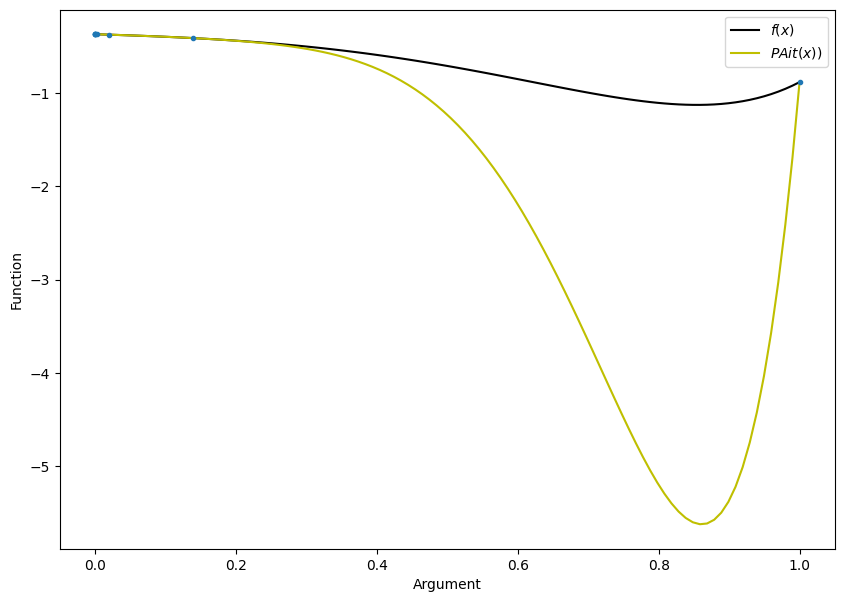

In [4]:
N = 8 
x = np.logspace(-6,0,N) 
f = lf.Poly(np.random.randn(N))
y = f(x) 

P_Ait = mf.Aitken(x,y)
z_Ait = P_Ait(x)

p = lf.interp_naive(x, y) 
z = p(x) 

print("Absolute error of Aitken's values", np.linalg.norm(z_Ait-y))
print("Absolute error of Aitken's coefficients", np.linalg.norm(f.pn-P_Ait.pn))

print("Absolute error of values", np.linalg.norm(z-y))
print("Absolute error of coefficients", np.linalg.norm(f.pn-p.pn))

t = np.linspace(0,1,100)
_, ax = plt.subplots(figsize=(10,7))
ax.plot(t, f(t), '-k')
ax.plot(t, P_Ait(t), '-y')

ax.plot(x, f(x), '.')
ax.set_xlabel("Argument")
ax.set_ylabel("Function")
ax.legend(["$f(x)$", "$PAit(x))$",])
plt.show()

mass = np.array(y).tolist()
j = 0
for i in range(0,N-1):
  for k in range(0, N-1-j):
    pols = (mass[k]*(x[k+1+j]-t) - mass[k+1]*(x[k]-t))/(x[k+1+j]-x[k])
    mass.append(pols)

  del mass[:N-j]
  j = j + 1


7. Численная неустойчивость означает, что даже небольшие ошибки в исходных данных (погрешности в значениях узлов​ или значений функции​) могут привести к значительным ошибкам в результатах интерполяции. Причины численной неустойчивости метода Лагранжа связаны с особенностями вычислений:

Влияние глобальной структуры: Полином Лагранжа представляет собой единую глобальную функцию, которая проходит через все узлы интерполяции. Если узлы расположены неравномерно или на больших интервалах, коэффициенты полинома становятся очень большими. Это усиливает влияние ошибок округления при вычислениях.

Осцилляции (эффект Рунге): Для равномерно распределённых узлов на больших интервалах интерполяционный полином Лагранжа может демонстрировать значительные осцилляции вблизи концов интервала, даже если исходная функция гладкая.

Сложность вычислений: Метод Лагранжа требует вычисления базисных полиномов для каждого узла

8. Наименьшая ошибка при интерполяции многочленом Лагранжа достигается, если узлы интерполяции расположены по корням полинома Чебышёва. Это связано с тем, что сгущаясь к краям интервала они уменьшают эффект Рунге (осциляции на краях).

# Задания

9. Найдите погрешность прилижения функции $f$ интерполяционным многолченом $p$ для $x0=10, 100, 1000$ и для $N=5, 10, 15$. Объясните получающиеся результаты.

10. Постройте график зависимости ошибки от числа узлов интерполяции $N$ для $x0=100$ и $r=5$ в диапазоне  $5\leq N \leq 50$. 

11. Повторите задания 9 и 10 для узлов интерполяции Чебышева:

$$x_n=x0+r\cos\left(\frac{\pi}{2}\frac{2n-1}{N}\right),\; k=1\ldots N.$$

12. Сравните распределение ошибки внутри интервала $x\in[x0-r,x0+r]$ для равномерно расположенных узлов и для узлов Чебышева.

13. Повторите задания 9 и 10 для функции $f(x)=|x-1|$, $x0=1$, $r=1$. Объясните наблюдающиеся различия.

# Решения

9 - 10.

Максимум отклонения построенного приближения от изначальной функции

\begin{equation}
|| f - p_n || \leq \frac{||f^{(n)} || \cdot ||w_n||}{n!}
\end{equation}

Норма интерполяционного веса $w_n(x)$
\begin{equation}
  w_n(x) = \prod_{i = 1}^n (x - x_i)
\end{equation}

Данная формула показывает, что при увеличении $n$ уменьшается погрешность. И также при увеличении $x$ увеличивается как погрешность, так и ошибка.

Получившиеся результаты для разных $N$ и $x_0$:
|   N\x0  |   $10$   |  $100$ | $1000$ |
|--------|----------------|-------------|-------------|
| $5$ | $21$ | $200$ | $1942$ |
| $10$ | $53$ | $290$ | $145295$ |
| $15$ | $5$ | $4676$ | $29153$ |

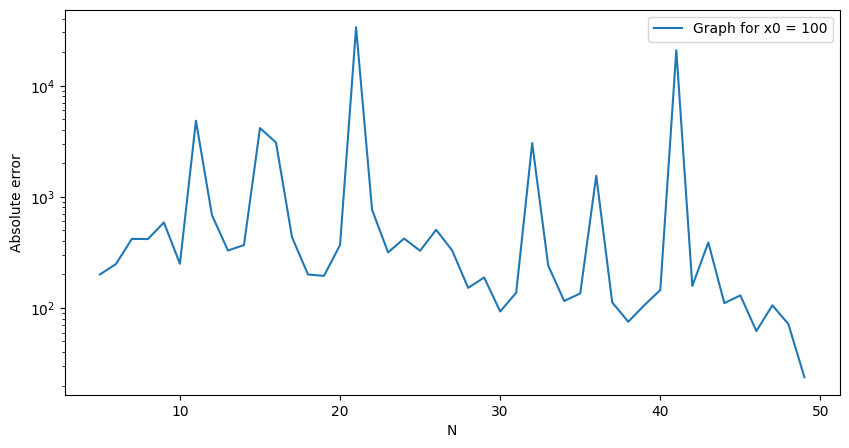

In [7]:
#В качестве интерполируемой функции возьмем f(x)=x sin(2x).
def f(x):
    return x*np.sin(2*x)
number = []
num_error = []
# Будем интерполировать функцию на интервале [x0-r,x0+r], где
x0 = 100
r = 5
tn = np.linspace(x0-r, x0+r, 1000)

for N in range(5,50):
# В качестве узлов интерполяции возьмем равномерную решетку из N узлов.
    xn = np.linspace(x0-r, x0+r, N)

# Построим интерполяционный многочлен.
    p = lf.interp_naive(xn, f(xn))

    error = np.abs(f(tn)-p(tn))
    number.append(N)
    num_error.append(np.max(error))

_, ax = plt.subplots(figsize=(10,5))
ax.semilogy(number, num_error)
ax.legend(["Graph for x0 = 100"])
ax.set_xlabel("N")
ax.set_ylabel("Absolute error")
plt.show()

11. 

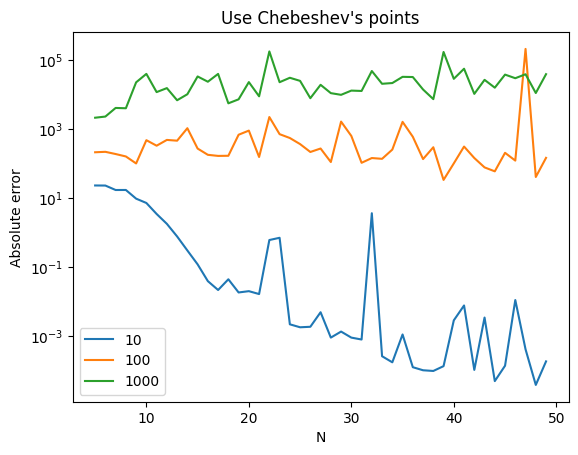

In [28]:
def f(x):
    return x*np.sin(2*x)

# Будем интерполировать функцию на интервале [x0-r,x0+r], где
for x0 in [10, 100, 1000]:

    r = 5
    tn = np.linspace(x0-r, x0+r, 1000)
    xn = np.linspace(x0-r, x0+r, 50)
    error = []
    number = []
    num_error = []


    # В качестве узлов интерполяции возьмем равномерную решетку из N узлов.
    for i in range(50):
        xn[i] = x0+r*np.cos(np.pi/2*(2*i+1)/50)
    y = f(xn)


    for N in range(5,50):
        xn = np.linspace(x0-r, x0+r, N)
    # В качестве узлов интерполяции возьмем равномерную решетку из N узлов.
        for i in range(N):
            xn[i] = x0+r*np.cos(np.pi/2*(2*i+1)/N)
        y = f(xn)

    # Построим интерполяционный многочлен.
        p = lf.interp_naive(xn, f(xn))

        error = np.abs(f(tn)-p(tn))
        number.append(N)
        num_error.append(np.max(error))
    
    # ploting
    plt.semilogy(number, num_error)

plt.xlabel("N")
plt.ylabel("Absolute error")
plt.legend(["10", "100", "1000"])
plt.title("Use Chebeshev's points")
plt.show()



12. Чебешовское распределение лучше

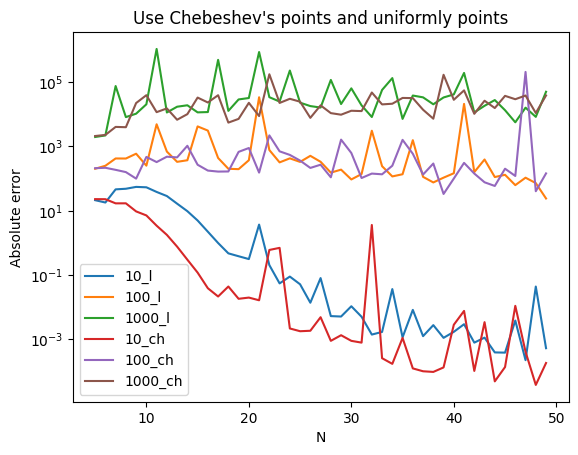

In [31]:
def f(x):
    return x*np.sin(2*x)

## РАВНОМЕРНОЕ РАСПРЕДЕЛЕНИЕ ТОЧЕК
# Будем интерполировать функцию на интервале [x0-r,x0+r], где
for x0 in [10, 100, 1000]:

    r = 5
    tn = np.linspace(x0-r, x0+r, 1000)
    xn = np.linspace(x0-r, x0+r, 50)
    error = []
    number = []
    num_error = []

    for N in range(5,50):
        xn = np.linspace(x0-r, x0+r, N)
        y = f(xn)

    # Построим интерполяционный многочлен.
        p = lf.interp_naive(xn, f(xn))

        error = np.abs(f(tn)-p(tn))
        number.append(N)
        num_error.append(np.max(error))
    
    # ploting
    plt.semilogy(number, num_error)



## ЧЕБЕШОВСКОЕ РАСПРЕДЕЛЕНИЕ ТОЧЕК
# Будем интерполировать функцию на интервале [x0-r,x0+r], где
for x0 in [10, 100, 1000]:

    r = 5
    tn = np.linspace(x0-r, x0+r, 1000)
    xn = np.linspace(x0-r, x0+r, 50)
    error = []
    number = []
    num_error = []

    for N in range(5,50):
        xn = np.linspace(x0-r, x0+r, N)
    # В качестве узлов интерполяции возьмем равномерную решетку из N узлов.
        for i in range(N):
            xn[i] = x0+r*np.cos(np.pi/2*(2*i+1)/N)
        y = f(xn)

    # Построим интерполяционный многочлен.
        p = lf.interp_naive(xn, f(xn))

        error = np.abs(f(tn)-p(tn))
        number.append(N)
        num_error.append(np.max(error))
    
    # ploting
    plt.semilogy(number, num_error)

plt.xlabel("N")
plt.ylabel("Absolute error")
plt.legend(["10_l", "100_l", "1000_l", "10_ch", "100_ch", "1000_ch"])
plt.title("Use Chebeshev's points and uniformly points")
plt.show()

13. График так себя ведет, т.к. есть ошибка из производной функции. Функция не гладкая в нуле.

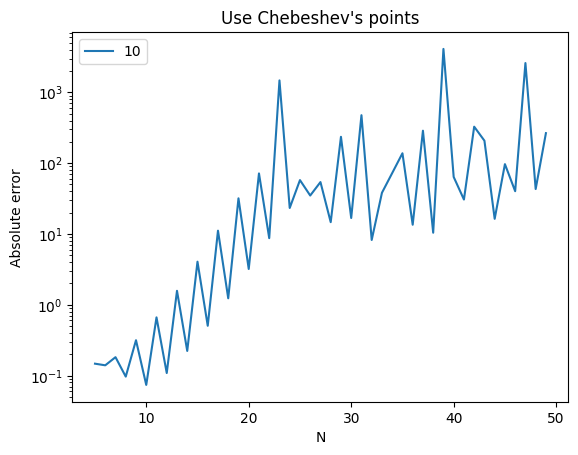

In [37]:
def f(x):
    return np.abs(x-1)

# Будем интерполировать функцию на интервале [x0-r,x0+r], где
for x0 in [1]:

    r = 1
    tn = np.linspace(x0-r, x0+r, 1000)
    error = []
    number = []
    num_error = []


    for N in range(5,50):
        xn = np.linspace(x0-r, x0+r, N)
        y = f(xn)

    # Построим интерполяционный многочлен.
        p = lf.interp_naive(xn, f(xn))

        error = np.abs(f(tn)-p(tn))
        number.append(N)
        num_error.append(np.max(error))
    
    # ploting
    plt.semilogy(number, num_error)

plt.xlabel("N")
plt.ylabel("Absolute error")
plt.legend(["10", "100", "1000"])
plt.title("Use Chebeshev's points")
plt.show()

# Задания

14. Для функции из задания 9 постройте кубический сплайн дефекта 1 с узлами из задания 9. Можете воспользоваться функциями `scipy.interpolate.splrep` и `scipy.interpolate.splev` или реализовать свои аналоги.

15. Изучите зависимость погрешности приближения функции сплайном от числа узлов интерполяции. Сравните с результатом из задания 10. Когда погрешности совпадут?

16. Как можно обобщить изученные методы интерполяции на кривые в многомерном пространстве? 

17. Как можно интерполировать функции нескольких переменных?

18. Какие еще способы интерполяции существуют?

14. 

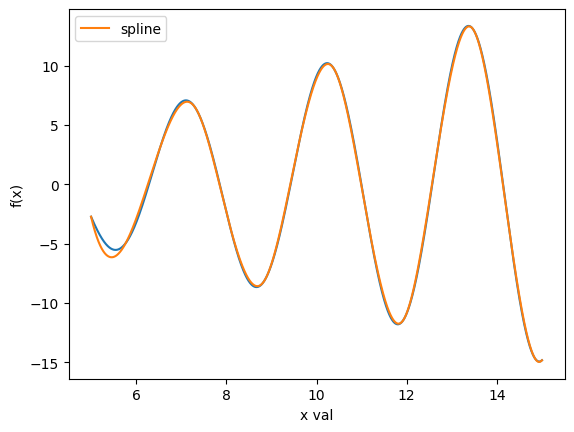

In [44]:
def f(x):
    return x*np.sin(2*x)
from scipy.interpolate import splev, splrep
for x0 in [10]:
    r = 5
    tn = np.linspace(x0-r, x0+r, 10000)

    xn = np.linspace(x0-r, x0+r, 14)
    yn = f(xn)
    spl = splrep(xn, yn)
    y2 = splev(tn, spl)
    plt.plot(tn,f(tn))
    plt.plot(tn,y2,label = 'spline')
plt.xlabel("x val")
plt.ylabel("f(x)")
plt.legend()

15. Для кубического сплайна есть формула зависимость погрешности от количества узлов:
$x \in [a,b]$, $M = \max|f^{(4)}(x)|$
\begin{equation}
|| f(x) - S_n(x) || \leq \frac{M(x-a)(b - x)}{n^4}
\end{equation}

Но в данном случае построим график абсолютной погрешности и сравним с предыдущими графиками.

c:\Users\tor\Desktop\numerecal methods\laboratory_work_4\lab_funcs.py:24: RuntimeWarning: overflow encountered in multiply
  a *= x # Повышаем степень одночлена
c:\Users\tor\Desktop\numerecal methods\laboratory_work_4\lab_funcs.py:29: RuntimeWarning: overflow encountered in power
  return np.power(xn[:,None], np.arange(len(xn))[None,:])


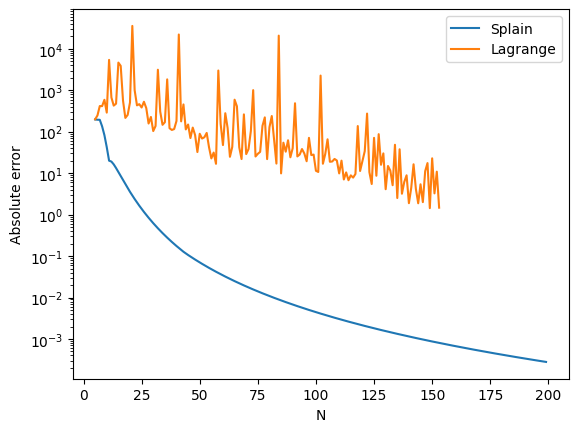

In [46]:
number = []
num_error = []
x0 = 100
r = 5
tn = np.linspace(x0-r, x0+r, 10000)
# Сплайн
for N in range(5,200):
    xn = np.linspace(x0-r, x0+r, N)
    yn = f(xn)
    spl = splrep(xn, yn)
    y2 = splev(tn, spl)
    error = np.abs(f(tn)-y2)
    number.append(N)
    num_error.append(np.max(error))

plt.semilogy(number, num_error)

number = []
num_error = []
# Обычная интерполяция
for N in range(5,200):
    xn = np.linspace(x0-r, x0+r, N)
    yn = f(xn)
    p = lf.interp_naive(xn, yn)
    y2 = p(tn)
    error = np.abs(f(tn)-y2)
    number.append(N)
    num_error.append(np.max(error))

plt.semilogy(number, num_error)

plt.legend(["Splain", "Lagrange"])
plt.xlabel("N")
plt.ylabel("Absolute error")
plt.show()

16. 
Интерполяцию можно обобщить на многомерные кривые и поверхности, используя параметризацию кривых (например, через параметр $t$) и методы, такие как сплайны (например, B-сплайны) или методы наименьших квадратов. Для кривых и поверхностей используются сплайны, аппроксимирующие данные в многомерных точках.

17. 
Многочлены Лагранжа для нескольких переменных (например, для двух переменных 
$f(𝑥,𝑦)$).

Сплайны: билинейные и бикубические сплайны для интерполяции данных в двух и более измерениях.
Методы ближайших соседей и метод минимальных квадратов также могут использоваться для многомерных данных.

18. 
Метод ближайших соседей — простое приближение значением ближайшей точки.

Метод Радиационных Базисных Функций (RBF) — эффективен для неравномерных данных.

Интерполяция наименьшими квадратами — для аппроксимации с минимизацией ошибки.

Методы машинного обучения — деревья решений и регрессия.

Интерполяция на графах — для данных на графах, например, в географических системах.
